# Arm's Companion & Rival plant problem
- https://igraph.org/python/doc/tutorial/tutorial.html
- https://networkx.github.io/documentation/stable/tutorial.html#adding-attributes-to-graphs-nodes-and-edges
- 800 pages pdf: https://networkx.github.io/documentation/latest/_downloads/networkx_reference.pdf
- **sentiment analysis**

In [ ]:
!pip install python-igraph

In [110]:
import igraph as g
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import itertools as i
import numpy as np
import os

In [113]:
pwd

'C:\\Users\\apansukij\\Desktop\\play'

In [112]:
os.chdir('C:\\Users\\apansukij\\Desktop\\play')

In [4]:
print("igraph version = "+g.__version__)
print("networkx version = "+nx.__version__)

igraph version = 0.9.6
networkx version = 2.4


## Import and QA the data

### Import

In [5]:
df=pd.read_csv('raw_data.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, Apple to Zucchini
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Apple             12 non-null     float64
 1   Apricot           14 non-null     float64
 2   Asparagus         5 non-null      float64
 3   Basil             9 non-null      float64
 4   Beans             24 non-null     float64
 5   Broad Beans       13 non-null     float64
 6   Bush Beans        15 non-null     float64
 7   Climbing Beans    13 non-null     float64
 8   Beets             13 non-null     float64
 9   Borage            9 non-null      float64
 10  Broccoli          15 non-null     float64
 11  Brussell Sprouts  14 non-null     float64
 12  Cabbages          27 non-null     float64
 13  Chamomile         3 non-null      float64
 14  Carrots           19 non-null     float64
 15  Cauliflower       16 non-null     float64
 16  Celery            12 non-null     float64

In [6]:
df.head()

,Apple,Apricot,Asparagus,Basil,Beans,Broad Beans,Bush Beans,Climbing Beans,Beets,Borage,...,Spinach,Squash,Strawberries,Stinging Nettle,Sunﬂower,Tansy,Thyme,Tomato,Yarrow,Zucchini
Apple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
Apricot,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,1.0,1.0,NaN,0.0,1.0,NaN
Asparagus,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Basil,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Beans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
range(len(df)+1)

range(0, 69)

In [8]:
df.iloc[0,0]

nan

In [9]:
4762/2

2381.0

In [10]:
df1=df.replace(0,-1).fillna(0).copy()
df1

,Apple,Apricot,Asparagus,Basil,Beans,Broad Beans,Bush Beans,Climbing Beans,Beets,Borage,...,Spinach,Squash,Strawberries,Stinging Nettle,Sunﬂower,Tansy,Thyme,Tomato,Yarrow,Zucchini
Apple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
Apricot,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,-1.0,1.0,0.0
Asparagus,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Basil,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Beans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tansy,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Thyme,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tomato,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Yarrow,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df1.columns

Index(['Apple', 'Apricot', 'Asparagus', 'Basil', 'Beans', 'Broad Beans',
       'Bush Beans', 'Climbing Beans', 'Beets', 'Borage', 'Broccoli',
       'Brussell Sprouts', 'Cabbages', 'Chamomile', 'Carrots', 'Cauliflower',
       'Celery', 'Cherry', 'Chervil', 'Chives', 'Coriander', 'Corn',
       'Cucumber', 'Dill', 'Eggplant', 'Fennel', 'Marigold', 'Fruit Trees',
       'Garlic', 'Gooseberry', 'Grape Vine', 'Grass', 'Horseradish',
       'Lavender', 'Leeks', 'Lemon Balm', 'Lettuce', 'Marjoram', 'Mints',
       'Mulberry', 'Mustard', 'Nasturtiums', 'Onions', 'Parsley', 'Parsnip',
       'Peas', 'Pennyroyal', 'Potato', 'Pumpkin', 'Radish', 'Raspberry',
       'Rosemary', 'Roses', 'Rue', 'Sage', 'Savory', 'Shallots', 'Silverbeet',
       'Spinach', 'Squash', 'Strawberries', 'Stinging Nettle', 'Sunﬂower',
       'Tansy', 'Thyme', 'Tomato', 'Yarrow', 'Zucchini'],
      dtype='object')

In [59]:
df1.index

Index(['Apple', 'Apricot', 'Asparagus', 'Basil', 'Beans', 'Broad Beans',
       'Bush Beans', 'Climbing Beans', 'Beets', 'Borage', 'Broccoli',
       'Brussell Sprouts', 'Cabbages', 'Chamomile', 'Carrots', 'Cauliflower',
       'Celery', 'Cherry', 'Chervil', 'Chives', 'Coriander', 'Corn',
       'Cucumber', 'Dill', 'Eggplant', 'Fennel', 'Marigold', 'Fruit Trees',
       'Garlic', 'Gooseberry', 'Grape Vine', 'Grass', 'Horseradish',
       'Lavender', 'Leeks', 'Lemon Balm', 'Lettuce', 'Marjoram', 'Mints',
       'Mulberry', 'Mustard', 'Nasturtiums', 'Onions', 'Parsley', 'Parsnip',
       'Peas', 'Pennyroyal', 'Potato', 'Pumpkin', 'Radish', 'Raspberry',
       'Rosemary', 'Roses', 'Rue', 'Sage', 'Savory', 'Shallots', 'Silverbeet',
       'Spinach', 'Squash', 'Strawberries', 'Stinging Nettle', 'Sunﬂower',
       'Tansy', 'Thyme', 'Tomato', 'Yarrow', 'Zucchini'],
      dtype='object')

In [62]:
if((df1.index==df1.columns).min()):
    print("The column name and index are the same.")

The column name and index are the same.


### Data QA

In [21]:
test=np.array([
    [1,2]
    ,[3,4]
])
test

array([[1, 2],
       [3, 4]])

In [26]:
if((test.transpose()==test).min()==False):
    print("At least one coordinate is not equal.")
else:
    print("All is correct.")

At least one coordinate is not equal.


In [16]:
np.array(df1).transpose()

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [35]:
compare_df=np.array(df1)
compare_df_transpose=compare_df.transpose()

if((compare_df==compare_df_transpose).min()==False):
    print("At least one coordinate is not equal.")
else:
    print("All is correct.")

At least one coordinate is not equal.


In [40]:
filterCompare=(compare_df==compare_df_transpose)

In [46]:
row, col=np.where(filterCompare==False)

In [49]:
compare_df

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ...,
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [57]:
df1.iloc[r,c]

1.0

In [64]:
col_name=df1.columns
col_name

Index(['Apple', 'Apricot', 'Asparagus', 'Basil', 'Beans', 'Broad Beans',
       'Bush Beans', 'Climbing Beans', 'Beets', 'Borage', 'Broccoli',
       'Brussell Sprouts', 'Cabbages', 'Chamomile', 'Carrots', 'Cauliflower',
       'Celery', 'Cherry', 'Chervil', 'Chives', 'Coriander', 'Corn',
       'Cucumber', 'Dill', 'Eggplant', 'Fennel', 'Marigold', 'Fruit Trees',
       'Garlic', 'Gooseberry', 'Grape Vine', 'Grass', 'Horseradish',
       'Lavender', 'Leeks', 'Lemon Balm', 'Lettuce', 'Marjoram', 'Mints',
       'Mulberry', 'Mustard', 'Nasturtiums', 'Onions', 'Parsley', 'Parsnip',
       'Peas', 'Pennyroyal', 'Potato', 'Pumpkin', 'Radish', 'Raspberry',
       'Rosemary', 'Roses', 'Rue', 'Sage', 'Savory', 'Shallots', 'Silverbeet',
       'Spinach', 'Squash', 'Strawberries', 'Stinging Nettle', 'Sunﬂower',
       'Tansy', 'Thyme', 'Tomato', 'Yarrow', 'Zucchini'],
      dtype='object')

In [65]:
col_name[r]

'Apricot'

In [91]:
[x for x in zip(row,col)]

[(1, 19),
 (3, 41),
 (4, 45),
 (7, 65),
 (9, 15),
 (9, 59),
 (10, 41),
 (12, 33),
 (12, 39),
 (12, 46),
 (13, 33),
 (14, 16),
 (14, 20),
 (14, 46),
 (14, 53),
 (15, 9),
 (15, 36),
 (16, 14),
 (16, 20),
 (16, 36),
 (17, 18),
 (17, 28),
 (17, 35),
 (17, 65),
 (18, 17),
 (18, 28),
 (18, 35),
 (18, 36),
 (18, 37),
 (18, 39),
 (18, 44),
 (18, 45),
 (18, 66),
 (19, 1),
 (19, 39),
 (19, 43),
 (19, 44),
 (19, 45),
 (19, 58),
 (20, 14),
 (20, 16),
 (20, 23),
 (20, 25),
 (20, 26),
 (20, 43),
 (20, 44),
 (21, 44),
 (21, 59),
 (22, 23),
 (23, 20),
 (23, 22),
 (23, 26),
 (23, 43),
 (23, 44),
 (24, 37),
 (25, 20),
 (25, 37),
 (26, 20),
 (26, 23),
 (26, 59),
 (27, 31),
 (27, 35),
 (27, 59),
 (28, 17),
 (28, 18),
 (28, 31),
 (28, 35),
 (28, 45),
 (28, 59),
 (28, 60),
 (29, 45),
 (31, 27),
 (31, 28),
 (33, 12),
 (33, 13),
 (33, 37),
 (33, 52),
 (33, 53),
 (33, 57),
 (34, 57),
 (35, 17),
 (35, 18),
 (35, 27),
 (35, 28),
 (35, 37),
 (35, 39),
 (35, 41),
 (35, 52),
 (35, 53),
 (36, 15),
 (36, 16),
 (36, 1

#### Need to have an eye on this

In [101]:
count=0
col1=[]
col2=[]
value1=[]
value2=[]

for r, c in [x for x in zip(row,col)]:
#     print(f"""coordinate[{count}]
# ({col_name[r]},{col_name[c]}):{compare_df[r][c]}
# ({col_name[c]},{col_name[r]}):{compare_df[c][r]}
# """)
#     count+=1
    col1.append(col_name[r])
    col2.append(col_name[c])
    value1.append(compare_df[r][c])
    value2.append(compare_df[c][r])

In [114]:
pd.DataFrame({
    'first_plant':col1
    , 'second_plant':col2
    , 'first_value':value1
    , 'second_value':value2
#     , 'final_value':[]
}).to_csv('plant_mismatched_relationship_20210730.csv',index=False)

In [109]:
pwd

'C:\\Users\\apansukij'

# <span style="color:green">Knowledge</span>
- case competition of standford student 2010: http://snap.stanford.edu/class/cs224w-2010/CS224w_competition.pdf
- structural balance theory: network with signed edges
- Need density-based clustering: https://realpython.com/k-means-clustering-python/

## Fit Clustering
- DBSCAN: Density-Based Spatial Clustering of Applications with Noise
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
 - https://scikit-learn.org/stable/modules/clustering.html#dbscan
- OPTICS: Ordering Points To Identify the Clustering Structure
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS

In [100]:
from sklearn.cluster import DBSCAN

## Fit into graph with NetworkX(Signed Network Analysis)
- convert pandas dataframe into graph
- both positive and negative edges/relations
- https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_adjacency.html

In [16]:
Network_att=dir(nx)
[i for i in Network_att if re.search('from',i)]

['from_dict_of_dicts',
 'from_dict_of_lists',
 'from_edgelist',
 'from_graph6_bytes',
 'from_nested_tuple',
 'from_numpy_array',
 'from_numpy_matrix',
 'from_pandas_adjacency',
 'from_pandas_edgelist',
 'from_prufer_sequence',
 'from_scipy_sparse_matrix',
 'from_sparse6_bytes']

In [17]:
graph1=nx.from_pandas_adjacency(df1)
print(nx.info(graph1))

Name: 
Type: Graph
Number of nodes: 68
Number of edges: 412
Average degree:  12.1176


In [138]:
nodes=list(nx.nodes(graph1))
[i for i in nodes if re.search('Car',i)]

['Carrots']

In [8]:
[i for i in nx.neighbors(graph1,'Carrots')]

['Carrots',
 'Apple',
 'Apricot',
 'Asparagus',
 'Basil',
 'Beans',
 'Broad Beans',
 'Bush Beans',
 'Climbing Beans',
 'Beets',
 'Borage',
 'Broccoli',
 'Brussell Sprouts',
 'Cabbages',
 'Chamomile',
 'Cauliflower',
 'Celery',
 'Cherry',
 'Chervil',
 'Chives',
 'Coriander',
 'Corn',
 'Cucumber',
 'Dill',
 'Eggplant',
 'Fennel',
 'Marigold',
 'Fruit Trees',
 'Garlic',
 'Gooseberry',
 'Grape Vine',
 'Grass',
 'Horseradish',
 'Lavender',
 'Leeks',
 'Lemon Balm',
 'Lettuce',
 'Marjoram',
 'Mints',
 'Mulberry',
 'Mustard',
 'Nasturtiums',
 'Onions',
 'Parsley',
 'Peas',
 'Pennyroyal',
 'Potato',
 'Pumpkin',
 'Radish',
 'Raspberry',
 'Rosemary',
 'Roses',
 'Rue',
 'Sage',
 'Savory',
 'Shallots',
 'Silverbeet',
 'Spinach',
 'Squash',
 'Strawberries',
 'Stinging Nettle',
 'Sunﬂower',
 'Tansy',
 'Thyme',
 'Tomato',
 'Yarrow',
 'Zucchini']

In [18]:
nx.edges(graph1)
# print relationship

EdgeView([('Apple', 'Chives'), ('Apple', 'Marigold'), ('Apple', 'Garlic'), ('Apple', 'Grass'), ('Apple', 'Horseradish'), ('Apple', 'Lemon Balm'), ('Apple', 'Mustard'), ('Apple', 'Nasturtiums'), ('Apple', 'Potato'), ('Apple', 'Spinach'), ('Apple', 'Tansy'), ('Apple', 'Yarrow'), ('Apricot', 'Basil'), ('Apricot', 'Chives'), ('Apricot', 'Marigold'), ('Apricot', 'Garlic'), ('Apricot', 'Grass'), ('Apricot', 'Horseradish'), ('Apricot', 'Lemon Balm'), ('Apricot', 'Mustard'), ('Apricot', 'Nasturtiums'), ('Apricot', 'Spinach'), ('Apricot', 'Stinging Nettle'), ('Apricot', 'Sunﬂower'), ('Apricot', 'Tansy'), ('Apricot', 'Tomato'), ('Apricot', 'Yarrow'), ('Asparagus', 'Basil'), ('Asparagus', 'Chives'), ('Asparagus', 'Marjoram'), ('Asparagus', 'Parsley'), ('Asparagus', 'Tomato'), ('Basil', 'Chives'), ('Basil', 'Cucumber'), ('Basil', 'Fennel'), ('Basil', 'Nasturtiums'), ('Basil', 'Rue'), ('Basil', 'Silverbeet'), ('Basil', 'Tomato'), ('Beans', 'Broccoli'), ('Beans', 'Brussell Sprouts'), ('Beans', 'Cabb

From excel 624 companions/123 rivals
- 312 companion combinations
- 60 rival combinations

In [139]:
len([(u, v) for (u, v, d) in graph1.edges(data=True) if d['weight']== -1])
# 345 companion relationships
# 67 rival relationships

67

In [19]:
for (u, v, wt) in graph1.edges.data('weight'):
    if wt== -1: print((u, v, wt))

('Apple', 'Grass', -1.0)
('Apple', 'Potato', -1.0)
('Apricot', 'Grass', -1.0)
('Apricot', 'Tomato', -1.0)
('Basil', 'Rue', -1.0)
('Basil', 'Silverbeet', -1.0)
('Beans', 'Chives', -1.0)
('Beans', 'Fennel', -1.0)
('Beans', 'Garlic', -1.0)
('Beans', 'Onions', -1.0)
('Beans', 'Shallots', -1.0)
('Broad Beans', 'Chives', -1.0)
('Broad Beans', 'Fennel', -1.0)
('Broad Beans', 'Garlic', -1.0)
('Broad Beans', 'Onions', -1.0)
('Bush Beans', 'Chives', -1.0)
('Bush Beans', 'Garlic', -1.0)
('Bush Beans', 'Onions', -1.0)
('Climbing Beans', 'Beets', -1.0)
('Climbing Beans', 'Chives', -1.0)
('Climbing Beans', 'Garlic', -1.0)
('Climbing Beans', 'Onions', -1.0)
('Climbing Beans', 'Sunﬂower', -1.0)
('Climbing Beans', 'Tomato', -1.0)
('Beets', 'Tomato', -1.0)
('Broccoli', 'Rue', -1.0)
('Broccoli', 'Strawberries', -1.0)
('Cabbages', 'Garlic', -1.0)
('Cabbages', 'Rue', -1.0)
('Cabbages', 'Strawberries', -1.0)
('Cabbages', 'Tomato', -1.0)
('Chamomile', 'Mints', -1.0)
('Carrots', 'Parsnip', -1.0)
('Cauliflower

In [20]:
from networkx.algorithms.cluster import clustering

In [21]:
clustering(graph1) #,node=''

{'Apple': 0.15151515151515152,
 'Apricot': 0.1523809523809524,
 'Asparagus': 0.7,
 'Basil': 0.25,
 'Beans': 0.286231884057971,
 'Broad Beans': 0.2948717948717949,
 'Bush Beans': 0.41904761904761906,
 'Climbing Beans': 0.3516483516483517,
 'Beets': 0.5641025641025641,
 'Borage': 0.35555555555555557,
 'Broccoli': 0.30833333333333335,
 'Brussell Sprouts': 0.34065934065934067,
 'Cabbages': 0.22988505747126436,
 'Chamomile': 0.6666666666666666,
 'Carrots': 0.3263157894736842,
 'Cauliflower': 0.36764705882352944,
 'Celery': 0.5512820512820513,
 'Cherry': 0.16666666666666666,
 'Chervil': 0.32051282051282054,
 'Chives': 0.2,
 'Coriander': 0.3484848484848485,
 'Corn': 0.358974358974359,
 'Cucumber': 0.35789473684210527,
 'Dill': 0.4,
 'Eggplant': 1.0,
 'Fennel': 0.25,
 'Marigold': 0.24210526315789474,
 'Fruit Trees': 0.13186813186813187,
 'Garlic': 0.17894736842105263,
 'Gooseberry': 0,
 'Grape Vine': 0.26666666666666666,
 'Grass': 0.35714285714285715,
 'Horseradish': 0.2,
 'Lavender': 0.277777

subgraph: https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html

In [27]:
[i for i in graph1.subgraph([1])]

[]

In [33]:
set([(1,0),(1,0)])

{(1, 0)}

## Louvain

In [41]:
import community as communityLouvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [37]:
graph2=nx.karate_club_graph()
partition=communityLouvain.best_partition(graph2)

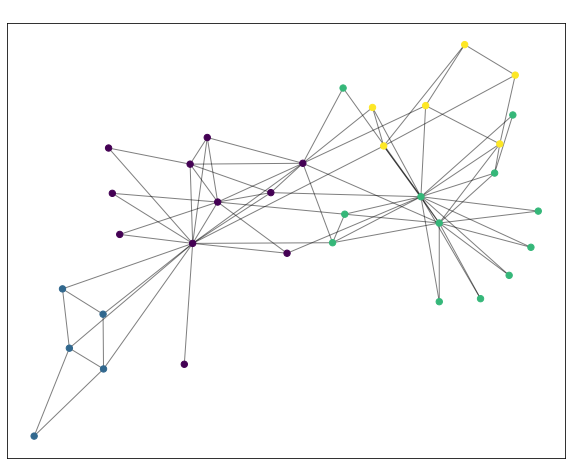

In [49]:
# draw the graph
pos = nx.spring_layout(graph2)

# color the nodes according to their partition
plt.figure(figsize=(10,8))
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(graph2, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(graph2, pos, alpha=0.5)
plt.title(" Test Python-Louvain ",color='white')
plt.show()

## Fit into graph with igraph
- fit into graph from normal pandas dataframe
- fit into grpah from pandas adjacency matrix(this is what I have)
- weight 0 means no weight at all in graph theory
- find subgraph of signed network in python
- https://www.traag.net/2015/03/03/powerblocs-social-balance-in-the-middle-east/
- https://github.com/taynaud/python-louvain
- https://python-louvain.readthedocs.io/en/latest/

In [ ]:
g.Graph.TupleList()